# Decision Trees for classifying Fake News

In this section, we will be exploring the power of decision trees in determining whether an article is fake or real. Decision trees our made up of a root node which splits into internal nodes which branches into edges and ends up at a leaf which is the end of the branch. The types of questions that we will ask ourselves when forming this decision tree will determine the accuracy of our tree. It is important to take into consideration the types of words used in the article, the grammar and spelling accuracy as well as keywords that are consistently used in fake articles when formulating our decision tree.

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

We firstly must import the data set from which we will be working with. 

In [3]:
import pandas as pd
df = pd.read_csv('news.csv')
df.head(6335)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


As we can see above within our data set we can see whether the article is real or fake. Once we have made our decision tree for the data we will then test the accuracy of using the Decision tree. This will be able to indicate whether it was a good way of classifying whether an article is real or fake.

From the Data pre-processing document the steps of the following code is explained in detail. We need to vectorise our articles into individual words. This makes our article easier to work with when implementing different techniques. 

In [4]:
# This is the code used to preprocess our dataset. 
# Each step is explained in detail in the 'Data Pre-processing' notebook.
#It is important to have this code in the notebook so we use the array with the Decision Tree Classifier

import numpy as np
import pandas as pd

df = pd.read_csv('news.csv')
df['news'] = df['title'] + ' ' + df['text']
convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df = df.drop([df.columns[0],df.columns[1],df.columns[2]],axis=1)
df = df.reindex(columns=['news','label'])

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()

for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    df.loc[index, 'news'] = filtered_article
    
df.head()


# We need the Vectorization

df_input = df['news']
df_output = df['label']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)
tf_idf_matrix


<6335x80967 sparse matrix of type '<class 'numpy.float64'>'
	with 1762247 stored elements in Compressed Sparse Row format>

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, test_size=0.3, random_state = 42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
accuracy = dtc.score(x_test,y_test)
accuracy

0.7995791688584956

As you can see we have got an accuracy of 80.0%. Since we set the test size at 30% it is crucial that we investigate the effect of test size to training size ratio to see whether it effects the accuracy. 

In [7]:
size = np.arange(0.01,0.5,0.01)
accuracy = []
for i in size:
    x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, test_size = i, random_state = 42)
    dtc.fit(x_train, y_train)
    a = dtc.score(x_test,y_test)
    accuracy.append(a)
accuracy 

[0.84375,
 0.8661417322834646,
 0.8795811518324608,
 0.8700787401574803,
 0.8517350157728707,
 0.8320209973753281,
 0.8198198198198198,
 0.8264299802761341,
 0.8143607705779334,
 0.8123028391167192,
 0.8235294117647058,
 0.812089356110381,
 0.8240291262135923,
 0.8252536640360767,
 0.8128286014721346,
 0.814595660749507,
 0.8180129990714949,
 0.8159509202453987,
 0.8056478405315615,
 0.8074191002367798,
 0.8302028549962435,
 0.8134863701578192,
 0.8106995884773662,
 0.8073635765943459,
 0.8150252525252525,
 0.816747572815534,
 0.8077147866744594,
 0.8060879368658399,
 0.8117519042437432,
 0.7916885849552867,
 0.789714867617108,
 0.8091715976331361,
 0.8067910090865614,
 0.797585886722377,
 0.8097385031559964,
 0.791319596668128,
 0.7965017064846417,
 0.7861295681063123,
 0.79279643868879,
 0.7947908445146015,
 0.8063895304080062,
 0.798196166854566,
 0.7937614678899083,
 0.8012912482065997,
 0.8028761837951596,
 0.7934819897084048,
 0.7938213566151779,
 0.7944755014797764,
 0.796457326

These are the different accuracys for each test size. A more visual representation of this would be to see a scatter graph of this.

Text(0, 0.5, 'Accuracy of Decision Tree Classifier')

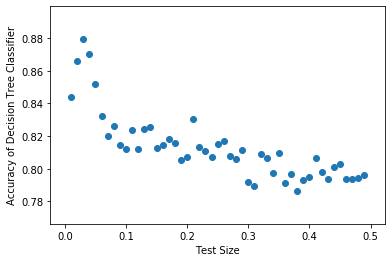

In [15]:
import matplotlib.pyplot as plt
plt.scatter(size, accuracy)
plt.xlabel('Test Size')
plt.ylabel('Accuracy of Decision Tree Classifier')

In [9]:
print(size[np.argmax(accuracy)])
print(accuracy[np.argmax(accuracy)]*100)

0.03
87.95811518324608


The Decision Tree Classifier give the best accuracy when we split the data into 97% training data and 3% testing data. The accuracy here is 88%. 

## Random Forest Classifier 

A Random Forest Classifier classifies the data by using subsections of the data. It uses averages to improve the overall accuracy of decision tress by creating a forest of many different decision trees. 

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
accuracy1 = rfc.score(x_test,y_test)
accuracy1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8154589371980676

The Random forest classifier has given us an improved accuracy to that of the Decision tree classifier. The accuracy is approximately 82% compared to 80% in the Decision tree classifier. Let's see if changing the size of the training and test data will change the accuracy of the Random forest classifier.  

In [11]:
size = np.arange(0.01,0.5,0.01)
accuracy1 = []
for i in size:
    x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, test_size = i, random_state = 42)
    rfc.fit(x_train, y_train)
    a = rfc.score(x_test,y_test)
    accuracy1.append(a)
accuracy1 

[0.921875,
 0.8740157480314961,
 0.8481675392670157,
 0.8700787401574803,
 0.8832807570977917,
 0.8661417322834646,
 0.8581081081081081,
 0.8441814595660749,
 0.8669001751313485,
 0.8596214511041009,
 0.8450502152080345,
 0.8580814717477004,
 0.8519417475728155,
 0.8387824126268321,
 0.8496319663512093,
 0.834319526627219,
 0.8560817084493965,
 0.8553900087642419,
 0.8380398671096345,
 0.846093133385951,
 0.8324567993989481,
 0.851506456241033,
 0.8340192043895748,
 0.834319526627219,
 0.8465909090909091,
 0.8325242718446602,
 0.8252483927527762,
 0.8280721533258174,
 0.8400435255712732,
 0.8369279326670174,
 0.8304480651731161,
 0.8348126232741617,
 0.8292682926829268,
 0.8217270194986073,
 0.8417493237150586,
 0.8277071459886015,
 0.8289249146757679,
 0.829734219269103,
 0.8263860785107244,
 0.8220205209155486,
 0.8371824480369515,
 0.8222472754603533,
 0.8176146788990826,
 0.8263988522238164,
 0.8333917923535602,
 0.8154373927958833,
 0.8159838817998657,
 0.8197961196974679,
 0.8177

This is an array of the different accuracys of the random forest classifier. We want to plot this data and see for what ratio of test to training data the random forest classifier outputs the highest accuracy.

Text(0, 0.5, 'Accuracy of Random Forest Classifier')

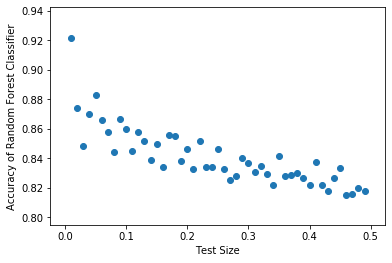

In [12]:
import matplotlib.pyplot as plt
plt.scatter(size, accuracy1)
plt.xlabel('Test Size')
plt.ylabel('Accuracy of Random Forest Classifier')

In [13]:
print(size[np.argmax(accuracy1)])
print(accuracy1[np.argmax(accuracy1)]*100)

0.01
92.1875


We can see here that the highest accuracy is 92% when the test size is 1%. 